In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_cars.csv')

In [3]:
df.head()

,full_name,registered_year,engine_capacity [cc],insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power [hp],seats,mileage [kmkg],body_type,city,resale_price [USD]
0,Maruti Baleno,2017,1197,Third Party,Manual,40000.0,First Owner,Petrol,80,5.0,28.533333,Hatchback,Agra,6540.0
1,Tata Hexa,2018,2179,Third Party,Automatic,70000.0,First Owner,Diesel,150,7.0,20.705882,MUV,Agra,12000.0
2,Maruti Swift,2015,1197,Third Party,Manual,70000.0,Second Owner,Petrol,80,5.0,27.800000,Sedan,Agra,5400.0
3,Hyundai i10,2009,1086,Third Party,Manual,80000.0,First Owner,Petrol,60,5.0,26.413333,Hatchback,Agra,1920.0
4,Hyundai i20,2015,1197,Third Party,Manual,70000.0,First Owner,Petrol,80,5.0,22.920000,Hatchback,Agra,5640.0


In [4]:
df.columns

Index(['full_name', 'registered_year', 'engine_capacity [cc]', 'insurance',
       'transmission_type', 'kms_driven', 'owner_type', 'fuel_type',
       'max_power [hp]', 'seats', 'mileage [kmkg]', 'body_type', 'city',
       'resale_price [USD]'],
      dtype='object')

In [5]:
len(df)

16261

In [7]:
df['brand'] = df['full_name'].str.split(' ',expand=True)[0]

In [8]:
df['brand'].head()

0     Maruti
1       Tata
2     Maruti
3    Hyundai
4    Hyundai
Name: brand, dtype: object

In [9]:
df['brand'].unique()

array(['Maruti', 'Tata', 'Hyundai', 'Honda', 'Toyota', 'Kia', 'Ford',
       'Mitsubishi', 'Mahindra', 'Audi', 'Volkswagen', 'Skoda', 'MG',
       'Renault', 'Nissan', 'Chevrolet', 'Datsun', 'Jeep', 'BMW',
       'Mercedes-Benz', 'Fiat', 'Land', 'Jaguar', 'Volvo', 'Isuzu',
       'Mini', 'Citroen', 'Porsche', 'Lexus', 'Force', 'OpelCorsa',
       'Daewoo', 'Bentley'], dtype=object)

In [10]:
df.columns

Index(['full_name', 'registered_year', 'engine_capacity [cc]', 'insurance',
       'transmission_type', 'kms_driven', 'owner_type', 'fuel_type',
       'max_power [hp]', 'seats', 'mileage [kmkg]', 'body_type', 'city',
       'resale_price [USD]', 'brand'],
      dtype='object')

In [11]:
df = df.drop(columns=['full_name','city'])

In [20]:
df['age'] = 2025 - df['registered_year']

In [21]:
df.head(1)

,resale_price [USD],brand,registered_year,engine_capacity [cc],insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power [hp],seats,mileage [kmkg],body_type,age
0,6540.0,Maruti,2017,1197,Third Party,Manual,40000.0,First Owner,Petrol,80,5.0,28.533333,Hatchback,8


In [22]:
df.drop(columns=['registered_year'],inplace=True)

In [23]:
df.dtypes

resale_price [USD]      float64
brand                    object
engine_capacity [cc]      int64
insurance                object
transmission_type        object
kms_driven              float64
owner_type               object
fuel_type                object
max_power [hp]            int64
seats                   float64
mileage [kmkg]          float64
body_type                object
age                       int64
dtype: object

In [12]:
last_two_columns = df.iloc[:, -2:]

data_without_last_two = df.iloc[:, :-2]

df = pd.concat([last_two_columns, data_without_last_two], axis=1)


df.head()

,resale_price [USD],brand,registered_year,engine_capacity [cc],insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power [hp],seats,mileage [kmkg],body_type
0,6540.0,Maruti,2017,1197,Third Party,Manual,40000.0,First Owner,Petrol,80,5.0,28.533333,Hatchback
1,12000.0,Tata,2018,2179,Third Party,Automatic,70000.0,First Owner,Diesel,150,7.0,20.705882,MUV
2,5400.0,Maruti,2015,1197,Third Party,Manual,70000.0,Second Owner,Petrol,80,5.0,27.800000,Sedan
3,1920.0,Hyundai,2009,1086,Third Party,Manual,80000.0,First Owner,Petrol,60,5.0,26.413333,Hatchback
4,5640.0,Hyundai,2015,1197,Third Party,Manual,70000.0,First Owner,Petrol,80,5.0,22.920000,Hatchback


In [15]:
len(df['brand'].unique())

33

In [16]:
len(df['body_type'].unique())

8

# MODELS

In [27]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   - -------------------------------------- 5.0/101.7 MB 18.9 MB/s eta 0:00:06
   -- ------------------------------------- 6.3/101.7 MB 20.4 MB/s eta 0:00:05
   -- ------------------------------------- 7.3/101.7 MB 10.8 MB/s eta 0:00:09
   ----- ---------------------------------- 13.6/101.7 MB 15.3 MB/s eta 0:00:06
   ------- -------------------------------- 19.9/101.7 MB 18.2 MB/s eta 0:00:05
   ---------- ----------------------------- 27.0/101.7 MB 20.6 MB/s eta 0:00:04
   ------------- -------------------------- 33.8/101.7 MB 22.4 MB/s eta 0:00:04
   --------------- ------------------------ 40.6/101.7 MB 23.7 MB/s eta 0:00:03
   ------------------ --------------------- 47.2/101.7 MB 24.6 MB/s eta 0:00:03
   --------------------- ------------------ 54.0/101.7 MB 25.3 MB/s eta 0:00:02
   ----------------------- ---------------- 60.6/101.7 MB 25.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [30]:
df['insurance'] = df['insurance'].replace({'Not Available': 0,'Third Party': 1,'Second': 2,'First': 3})
df['insurance'].unique()

array([1, 3, 0, 2], dtype=int64)

In [31]:
df['owner_type'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner',
       'Fourth Owner'], dtype=object)

In [32]:
df['owner_type'] = df['owner_type'].replace({'First Owner':4, 'Second Owner':3, 'Third Owner': 2, 'Fifth Owner': 0,
       'Fourth Owner': 1})

In [33]:
df['owner_type'].unique()

array([4, 3, 2, 0, 1], dtype=int64)

C:\Users\Lukasz\AppData\Local\Temp\ipykernel_23204\2627325459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")


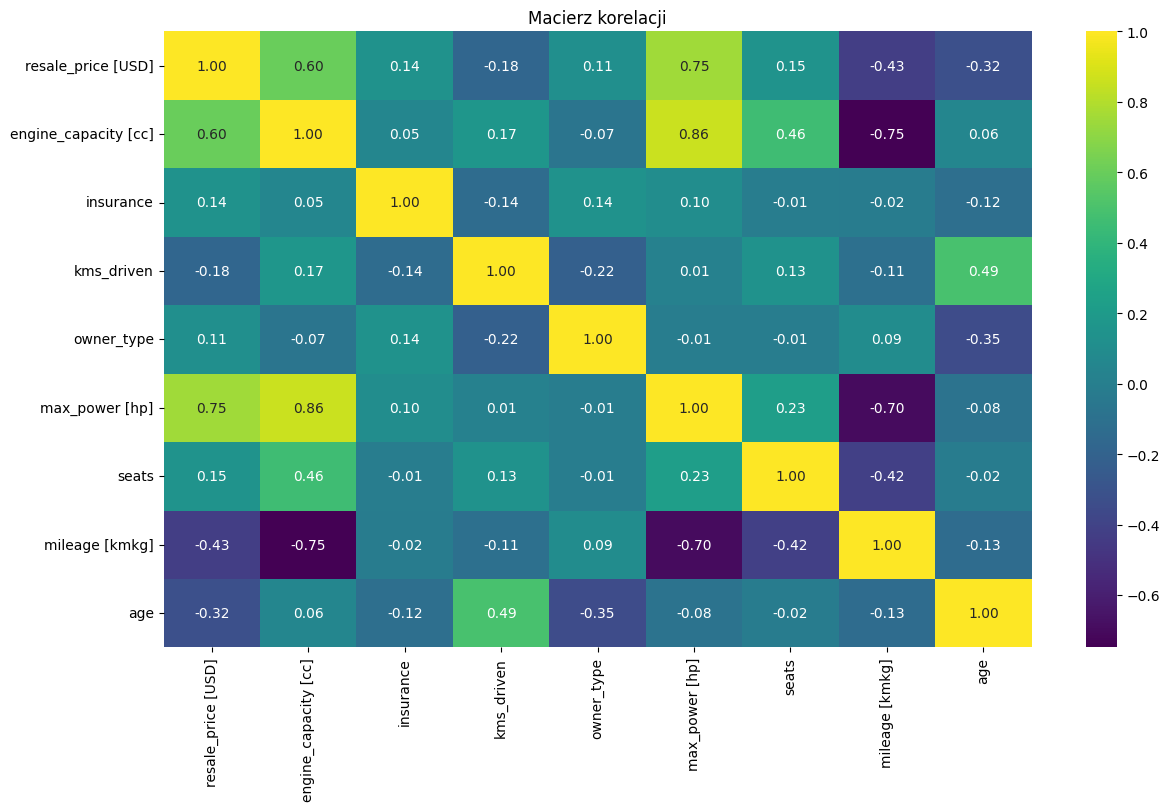

In [108]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

In [34]:
df.head()

,resale_price [USD],brand,engine_capacity [cc],insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power [hp],seats,mileage [kmkg],body_type,age
0,6540.0,Maruti,1197,1,Manual,40000.0,4,Petrol,80,5.0,28.533333,Hatchback,8
1,12000.0,Tata,2179,1,Automatic,70000.0,4,Diesel,150,7.0,20.705882,MUV,7
2,5400.0,Maruti,1197,1,Manual,70000.0,3,Petrol,80,5.0,27.800000,Sedan,10
3,1920.0,Hyundai,1086,1,Manual,80000.0,4,Petrol,60,5.0,26.413333,Hatchback,16
4,5640.0,Hyundai,1197,1,Manual,70000.0,4,Petrol,80,5.0,22.920000,Hatchback,10


In [82]:
X = df.drop(columns=['resale_price [USD]'])

y = df['resale_price [USD]']

In [116]:
categorical_features = ['brand', 'transmission_type', 'fuel_type', 'body_type']
ordinal_features = ['insurance', 'owner_type']  
numerical_features = ['engine_capacity [cc]', 'kms_driven', 'max_power [hp]', 'seats', 'mileage [kmkg]', 'age']


In [84]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = 'passthrough'  
numerical_transformer = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1 Attempt - Various regression models

In [98]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),   
        ('ord', ordinal_transformer, ordinal_features),            
        ('num', numerical_transformer, numerical_features)        
    ]
)

In [86]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'XGB': XGBRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)  
    y_pred = pipeline.predict(X_test)  
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2, 'MAE': mae}
    
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-squared: {r2}")
    print(f"{name} - Mean Absolute Error: {mae}\n")


Linear Regression - Mean Squared Error: 43586647.678438626
Linear Regression - R-squared: 0.7207916865158321
Linear Regression - Mean Absolute Error: 3105.60891339784

Ridge Regression - Mean Squared Error: 43750242.99355948
Ridge Regression - R-squared: 0.7197437240213135
Ridge Regression - Mean Absolute Error: 3118.041796941798

Lasso Regression - Mean Squared Error: 43689213.336712524
Lasso Regression - R-squared: 0.7201346691494286
Lasso Regression - Mean Absolute Error: 3113.8970123260706

Random Forest - Mean Squared Error: 13476303.674584042
Random Forest - R-squared: 0.9136731953156739
Random Forest - Mean Absolute Error: 1399.4658468308573

XGB - Mean Squared Error: 15538698.359703686
XGB - R-squared: 0.9004618617435391
XGB - Mean Absolute Error: 1367.0115066613503

Gradient Boosting - Mean Squared Error: 15785276.532661159
Gradient Boosting - R-squared: 0.8988823258195704
Gradient Boosting - Mean Absolute Error: 1730.8372013158044

CatBoost - Mean Squared Error: 11492372.9548

In [87]:
results = pd.DataFrame(data = results)
results

,Linear Regression,Ridge Regression,Lasso Regression,Random Forest,XGB,Gradient Boosting,CatBoost
MSE,4.358665e+07,4.375024e+07,4.368921e+07,1.347630e+07,1.553870e+07,1.578528e+07,1.149237e+07
R2,7.207917e-01,7.197437e-01,7.201347e-01,9.136732e-01,9.004619e-01,8.988823e-01,9.263819e-01
MAE,3.105609e+03,3.118042e+03,3.113897e+03,1.399466e+03,1.367012e+03,1.730837e+03,1.343921e+03


Best result - CatBoost, RandomForest and XGB

# 2 Attempt - RandomizedSearch on CatBoost

In [88]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),   
        ('ord', ordinal_transformer, ordinal_features),            
        ('num', numerical_transformer, numerical_features)        
    ]
)

In [89]:
param_distributions = {
    'regressor__iterations': [100, 200, 500, 750, 1000],  
    'regressor__depth': [3, 4, 6, 8, 10],  
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  
    'regressor__l2_leaf_reg': [1, 3, 5, 7, 10],  
    'regressor__border_count': [32, 50, 100, 150, 200],  
    'regressor__bootstrap_type': ['Bernoulli', 'MVS', 'Bayesian', 'Poisson', 'No'],  
    'regressor__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  
}

In [90]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(random_state=42))  
])

In [91]:
randomized = RandomizedSearchCV(
    estimator=model,
    n_iter=200,
    param_distributions=param_distributions,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42
)

randomized.fit(X_train, y_train)

print("Best Parameters:", randomized.best_params_)

y_pred = randomized.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
615 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

0:	learn: 10581.8203257	total: 5.18ms	remaining: 2.59s
1:	learn: 9526.2755359	total: 8.49ms	remaining: 2.11s
2:	learn: 8607.5847747	total: 12.7ms	remaining: 2.1s
3:	learn: 7867.0163739	total: 16.5ms	remaining: 2.04s
4:	learn: 7217.0336762	total: 20.3ms	remaining: 2.01s
5:	learn: 6668.6983892	total: 24.4ms	remaining: 2.01s
6:	learn: 6242.2763585	total: 28.7ms	remaining: 2.02s
7:	learn: 5881.4779773	total: 32.1ms	remaining: 1.97s
8:	learn: 5560.1321445	total: 35.7ms	remaining: 1.95s
9:	learn: 5313.0403333	total: 39.6ms	remaining: 1.94s
10:	learn: 5102.2743076	total: 43.7ms	remaining: 1.94s
11:	learn: 4915.0097949	total: 47.7ms	remaining: 1.94s
12:	learn: 4743.6873904	total: 51.9ms	remaining: 1.95s
13:	learn: 4592.5892890	total: 56ms	remaining: 1.94s
14:	learn: 4472.5054608	total: 60.6ms	remaining: 1.96s
15:	learn: 4361.2506310	total: 67.1ms	remaining: 2.03s
16:	learn: 4266.9670373	total: 73.4ms	remaining: 2.08s
17:	learn: 4175.6621927	total: 78.4ms	remaining: 2.1s
18:	learn: 4095.5137995

Score (MSE) is not better than on custom settings of CatBoost

# 3 Attempt - GridSearch on CatBoost

In [92]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),   
        ('ord', ordinal_transformer, ordinal_features),            
        ('num', numerical_transformer, numerical_features)        
    ]
)

In [93]:
param_grid = {
    'regressor__iterations': [100, 500, 1000],  
    'regressor__depth': [4, 6, 8],  
    'regressor__learning_rate': [0.01, 0.1, 0.2],  
    'regressor__l2_leaf_reg': [1, 5, 10],  
    'regressor__bootstrap_type': ['Bernoulli', 'MVS'],  
    'regressor__subsample': [0.7, 0.9, 1.0],  
}

In [94]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(random_state=42, verbose=0))  
])

In [95]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

randomized.fit(X_train, y_train)

print("Best Parameters:", randomized.best_params_)

y_pred = randomized.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
615 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

0:	learn: 10581.8203257	total: 5.62ms	remaining: 2.8s
1:	learn: 9526.2755359	total: 10.5ms	remaining: 2.62s
2:	learn: 8607.5847747	total: 15ms	remaining: 2.49s
3:	learn: 7867.0163739	total: 25.5ms	remaining: 3.16s
4:	learn: 7217.0336762	total: 31.3ms	remaining: 3.1s
5:	learn: 6668.6983892	total: 35.3ms	remaining: 2.91s
6:	learn: 6242.2763585	total: 39.9ms	remaining: 2.81s
7:	learn: 5881.4779773	total: 44ms	remaining: 2.71s
8:	learn: 5560.1321445	total: 49.5ms	remaining: 2.7s
9:	learn: 5313.0403333	total: 54.3ms	remaining: 2.66s
10:	learn: 5102.2743076	total: 58.7ms	remaining: 2.61s
11:	learn: 4915.0097949	total: 64.1ms	remaining: 2.6s
12:	learn: 4743.6873904	total: 68.7ms	remaining: 2.58s
13:	learn: 4592.5892890	total: 73.3ms	remaining: 2.54s
14:	learn: 4472.5054608	total: 77.9ms	remaining: 2.52s
15:	learn: 4361.2506310	total: 82.3ms	remaining: 2.49s
16:	learn: 4266.9670373	total: 87.4ms	remaining: 2.48s
17:	learn: 4175.6621927	total: 92ms	remaining: 2.46s
18:	learn: 4095.5137995	total

Score is not better than in 1 attempt

# 4 Attempt - default CatBoost

In [117]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),   
        ('ord', ordinal_transformer, ordinal_features),            
        ('num', numerical_transformer, numerical_features)        
    ]
)

In [118]:
model = CatBoostRegressor(random_state=42, verbose=0)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

pipeline.fit(X_train, y_train)  
y_pred = pipeline.predict(X_test)  

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

results[name] = {'MSE': mse, 'R2': r2, 'MAE': mae}

print(f"{name} - Mean Squared Error: {mse}")
print(f"{name} - R-squared: {r2}")
print(f"{name} - Mean Absolute Error: {mae}\n")


CatBoost - Mean Squared Error: 11492372.954859925
CatBoost - R-squared: 0.9263819026796867
CatBoost - Mean Absolute Error: 1343.9214682183992



In [119]:
import joblib

joblib.dump(pipeline, r'model.pkl')

['model.pkl']

In [124]:
model = joblib.load(r'model.pkl')

data = pd.DataFrame({
    'age': [5], 
    'engine_capacity [cc]': [3000], 
    'insurance': [0],
    'transmission_type': ['automatic'], 
    'kms_driven': [10000],
    'owner_type': [0], 
    'fuel_type': ['Petrol'],
    'max_power [hp]': [500],
    'seats': [5], 
    'mileage [kmkg]': [15], 
    'body_type': ['Sedan'],
    'brand': ['Audi']
})

predictions = model.predict(data)

print(f'Predicted price = {predictions[0].round(2)}$')

Predicted price = 82091.13$
